# The Data

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import ast
import re

# Load the data
data = pd.read_csv('/content/windows_rules_filter.csv')

# Convert string representation of lists to actual lists
data['Tags'] = data['Tags'].apply(ast.literal_eval)

# Analyze Tags
all_tags = [tag for tags in data['Tags'] for tag in tags]
tag_counts = Counter(all_tags)

print("Tag distribution:")
for tag, count in tag_counts.most_common():
    print(f"{tag}: {count}")

print(f"\nTotal number of unique tags: {len(tag_counts)}")
print(f"Number of rules: {len(data)}")

# Analyze rules with single tags
single_tag_rules = sum(len(tags) == 1 for tags in data['Tags'])
print(f"\nRules with a single tag: {single_tag_rules} ({single_tag_rules/len(data)*100:.2f}%)")

# Analyze rules with multiple tags
multi_tag_rules = sum(len(tags) > 1 for tags in data['Tags'])
print(f"Rules with multiple tags: {multi_tag_rules} ({multi_tag_rules/len(data)*100:.2f}%)")

# Analyze Detection column
def extract_features(detection_str):
    keywords = re.findall(r"'keywords': \[(.*?)\]", detection_str)
    keywords = [k.strip("'") for k in keywords[0].split(',')] if keywords else []

    event_id = re.findall(r"'EventID': (\d+)", detection_str)
    event_id = event_id[0] if event_id else ''

    provider = re.findall(r"'Provider_Name': '(.*?)'", detection_str)
    provider = provider[0] if provider else ''

    return keywords, event_id, provider

data['keywords'], data['event_id'], data['provider'] = zip(*data['Detection'].apply(extract_features))

# Analyze keywords
all_keywords = [kw for keywords in data['keywords'] for kw in keywords]
keyword_counts = Counter(all_keywords)

print("\nTop 10 keywords:")
for kw, count in keyword_counts.most_common(10):
    print(f"{kw}: {count}")

# Analyze EventIDs
event_id_counts = Counter(data['event_id'])

print("\nTop 10 EventIDs:")
for event_id, count in event_id_counts.most_common(10):
    print(f"{event_id}: {count}")

# Analyze Provider Names
provider_counts = Counter(data['provider'])

print("\nTop 10 Provider Names:")
for provider, count in provider_counts.most_common(10):
    print(f"{provider}: {count}")

# Analyze rules without keywords, EventID, or Provider Name
rules_without_features = sum(
    (len(kw) == 0 and len(eid) == 0 and len(prov) == 0)
    for kw, eid, prov in zip(data['keywords'], data['event_id'], data['provider'])
)
print(f"\nRules without keywords, EventID, or Provider Name: {rules_without_features} ({rules_without_features/len(data)*100:.2f}%)")

# Suggestions for next steps
print("\nSuggestions for next steps:")
print("1. Consider using a multi-label stratification technique for splitting the data.")
print("2. Implement data augmentation techniques for underrepresented classes.")
print("3. Use a hierarchical classification approach if there's a natural hierarchy in the MITRE ATT&CK techniques.")
print("4. Experiment with ensemble methods that combine binary classifiers for each tag.")
print("5. Consider using deep learning approaches like BERT for better feature extraction from the Detection field.")

Tag distribution:
T1059: 271
T1218: 210
T1562: 139
T1003: 128
T1027: 101
T1574: 95
T1112: 72
T1036: 67
T1021: 63
T1548: 60
T1546: 59
T1105: 50
T1070: 48
T1547: 47
T1564: 44
T1543: 43
T1047: 39
T1053: 37
T1569: 37
T1055: 37
T1202: 37
T1219: 32
T1552: 28
T1087: 26
T1204: 24
T1090: 24
T1033: 21
T1069: 20
T1505: 20
T1127: 20
T1566: 18
T1490: 18
T1567: 17
T1071: 17
T1558: 16
T1555: 16
T1134: 15
T1216: 15
T1572: 15
T1082: 15
T1197: 14
T1482: 14
T1553: 14
T1137: 14
T1560: 13
T1098: 12
T1048: 12
T1018: 12
T1106: 12
T1203: 10
T1489: 10
T1110: 10
T1588: 10
T1550: 10
T1136: 10
T1078: 10
T1133: 10
T1102: 10
T1587: 9
T1012: 9
T1046: 9
T1190: 8
T1140: 8
T1518: 8
T1068: 7
T1557: 7
T1486: 7
T1113: 7
T1210: 6
T1040: 6
T1528: 6
T1016: 6
T1005: 6
T1222: 5
T1570: 5
T1556: 5
T1485: 5
T1056: 5
T1559: 5
T1220: 5
T1049: 5
T1007: 5
T1083: 5
T1615: 5
T1211: 4
T1072: 4
T1649: 4
T1123: 4
T1201: 4
T1008: 4
T1074: 4
T1119: 4
T1132: 4
T1057: 4
T1491: 4
T1135: 4
T1212: 3
T1590: 3
T1200: 3
T1114: 3
T1554: 3
T1542: 3
T

# Gemini
## URL: https://g.co/gemini/share/51663cb0fcfc

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from ast import literal_eval
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Read the CSV file into a DataFrame
df = pd.read_csv('windows_rules_filter.csv')

# Convert `Tags` column to string
df['Tags'] = df['Tags'].astype(str)

# Convert string representation of dictionaries to actual dictionaries
df['Detection'] = df['Detection'].apply(literal_eval)

# Extract values from the dictionaries and create new columns
df['Keywords'] = df['Detection'].apply(lambda x: x.get('keywords', ''))
df['Filter'] = df['Detection'].apply(lambda x: x.get('filter', ''))
df['Selection'] = df['Detection'].apply(lambda x: x.get('selection', ''))
df['Condition'] = df['Detection'].apply(lambda x: x.get('condition', ''))

# Fill NaN values with empty strings
df['Keywords'].fillna('', inplace=True)
df['Filter'].fillna('', inplace=True)
df['Selection'].fillna('', inplace=True)
df['Condition'].fillna('', inplace=True)

# Combine text from multiple columns
df['Combined_Text'] = df['Keywords'].astype(str) + ' ' + df['Filter'].astype(str) + ' ' + df['Selection'].astype(str) + ' ' + df['Condition'].astype(str)

# Create a new dataframe with `Combined_Text` and `Tags`
df_processed = df[['Combined_Text', 'Tags']]

# Oversampling minority classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df_processed[['Combined_Text']], df_processed['Tags'])
df_processed = pd.concat([X_resampled, y_resampled], axis=1)

# Split the data into training and test sets with stratified sampling
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(df_processed, df_processed['Tags']):
    train_set = df_processed.loc[train_index]
    test_set = df_processed.loc[test_index]

# TF-IDF Vectorizer for text feature extraction
tfidf_vectorizer = TfidfVectorizer()

# SelectKBest for feature selection
selector = SelectKBest(chi2)

# Pipeline for preprocessing and classification
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('selector', selector),
    ('clf', None)  # Placeholder for the classifier
])

# Define different models (excluding XGBClassifier)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}

# Function to evaluate a model using cross-validation
def evaluate_model(model):
    pipeline.set_params(clf=model)
    scores = cross_val_score(pipeline, train_set['Combined_Text'], train_set['Tags'], cv=5, scoring='f1_weighted')
    return scores.mean()

# Store evaluation results
results = {}

# Iterate over models and k values
for model_name, model in models.items():
    for k in [500, 1000, 1500, 2000]:
        pipeline.set_params(clf=model, selector__k=k)
        f1_score = evaluate_model(model)
        results[(model_name, k)] = f1_score

# Find the best model and k
best_model, best_k = max(results, key=results.get)
best_f1_score = results[(best_model, best_k)]

# Train the best model on the full training set
pipeline.set_params(clf=models[best_model], selector__k=best_k)
pipeline.fit(train_set['Combined_Text'], train_set['Tags'])

# Make predictions on the test set
y_pred = pipeline.predict(test_set['Combined_Text'])

# Evaluate the model on the test set
report = classification_report(test_set['Tags'], y_pred)

# Print the results
print(f"Best Model: {best_model}, Best k: {best_k}, Best F1-Score: {best_f1_score}")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Model: Random Forest, Best k: 2000, Best F1-Score: 0.7693210021560761
                                                                                   precision    recall  f1-score   support

                                                                        ['T1001']       1.00      1.00      1.00        32
                                                      ['T1003', 'T1021', 'T1059']       1.00      1.00      1.00        32
                                                      ['T1003', 'T1027', 'T1134']       1.00      1.00      1.00        32
                                                               ['T1003', 'T1036']       1.00      0.50      0.67        32
                                                               ['T1003', 'T1106']       1.00      1.00      1.00        32
                                                               ['T1003', 'T1218']       1.00      1.00      1.00        31
                                                      ['T1003',

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GPT
## URL: https://chatgpt.com/share/01e3facd-eb80-41f6-a4e2-7eb58f9d8e96

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Load the data
file_path = '/content/windows_rules_filter.csv'
data = pd.read_csv(file_path)

# Preprocessing steps
X = data['Detection'].astype(str)
y = data['Tags'].apply(lambda x: eval(x))

# Convert the labels to a binary format using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

# Use TF-IDF to extract features
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Convert sparse matrix to dense format
X_dense = X_tfidf.toarray()

# Reduce the dataset by focusing on the top 10 most frequent classes
label_distribution = np.sum(y, axis=0)
top_labels = np.argsort(label_distribution)[-10:]
y_reduced = y[:, top_labels]

# Filter to keep only samples with at least one of the top 10 labels
keep_samples = np.sum(y_reduced, axis=1) > 0
X_reduced = X_dense[keep_samples]
y_reduced = y_reduced[keep_samples]

# Perform a simple train-test split on the reduced dataset
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier for multi-label classification
multi_target_rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
multi_target_rf.fit(X_train_reduced, y_train_reduced)

# Predict on the test set
y_pred_rf = multi_target_rf.predict(X_test_reduced)

# Calculate precision, recall, and F1-score on the test set
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test_reduced, y_pred_rf, average='weighted')

# Output the evaluation metrics
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")


Precision: 0.7553226711560046
Recall: 0.3
F1-score: 0.4127534250378376


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Claude
## URL: https://aiarchives.org/id/Si1ebnCIlUISnZqJ6Cxg
## URL: `Like our final project`
## URL: https://aiarchives.org/id/uFrMUxwZlE4c3IIyd6IQ

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load the data
df = pd.read_csv('windows_rules_filter.csv')

# Distribute the data set in a balanced way into a training and test set
X = df['Detection']
y = df['Tags']

# Check class distribution
class_counts = dict(Counter(y))
print("Class distribution in the full dataset:")
print(class_counts)

# Identify classes with only 1 member
classes_with_one_member = [cls for cls, count in class_counts.items() if count == 1]

if classes_with_one_member:
    # Use a different approach for classes with only 1 member
    print(f"Found {len(classes_with_one_member)} classes with only 1 member:")
    print(classes_with_one_member)

    # Create a new DataFrame with only the classes that have at least 2 members
    mask = ~y.isin(classes_with_one_member)
    X_balanced = X[mask]
    y_balanced = y[mask]

    # Distribute the balanced data set in a balanced way into a training and test set
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)
else:
    # Distribute the data set in a balanced way into a training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Extracting features relevant to the task
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Oversampling minority classes
if classes_with_one_member:
    # Use RandomOverSampler for classes with only 1 member
    oversample = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversample.fit_resample(X_train_vectorized, y_train)
else:
    # Use SMOTE if all classes have at least 2 members
    oversample = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = oversample.fit_resample(X_train_vectorized, y_train)

print("Class distribution after oversampling:")
print(dict(Counter(y_train_resampled)))

# Examine several different models for a classification problem and perform cross validation
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_vectorized)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Class distribution in the full dataset:
{"['T1003']": 105, "['T1211', 'T1562']": 2, "['T1068', 'T1203', 'T1210', 'T1211', 'T1212', 'T1499']": 1, "['T1070']": 37, "['T1072']": 3, "['T1489']": 10, "['T1218']": 159, "['T1219']": 32, "['T1110']": 7, "['T1588']": 8, "['T1059']": 132, "['T1059', 'T1204']": 2, "['T1197']": 8, "['T1649']": 4, "['T1543']": 30, "['T1567']": 15, "['T1090']": 17, "['T1071']": 14, "['T1590']": 3, "['T1574']": 86, "['T1200']": 2, "['T1562']": 117, "['T1069', 'T1087', 'T1482']": 1, "['T1587']": 8, "['T1505']": 12, "['T1550']": 5, "['T1021']": 31, "['T1012']": 5, "['T1098']": 11, "['T1087']": 7, "['T1207']": 2, "['T1222']": 5, "['T1059', 'T1087', 'T1114', 'T1550']": 1, "['T1053']": 29, "['T1123']": 3, "['T1021', 'T1543', 'T1569']": 3, "['T1027']": 24, "['T1112', 'T1562']": 8, "['T1091', 'T1200']": 1, "['T1136']": 7, "['T1134']": 12, "['T1554']": 3, "['T1027', 'T1059']": 63, "['T1566']": 11, "['T1003', 'T1569']": 2, "['T1021', 'T1569', 'T1570']": 2, "['T1547']": 43, "[

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Precision: 0.42, Recall: 0.38, F1-score: 0.38
Random Forest - Precision: 0.37, Recall: 0.36, F1-score: 0.35


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler

# Read the data from the CSV file
data = pd.read_csv('/content/windows_rules_filter.csv')

# Split the technique IDs into separate rows
data = data.assign(technique=data['Tags'].str.strip('[]').str.split(',')).explode('technique')
data['technique'] = data['technique'].str.strip("'")

# Prepare the features and target
X = data['Detection']
y = data['technique']

# Remove classes with insufficient members
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Feature selection using chi-square test
selector = SelectKBest(chi2, k=1000)
X_train_features = selector.fit_transform(X_train_features, y_train)
X_test_features = selector.transform(X_test_features)

# Handle class imbalance using random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_features, y_train = oversampler.fit_resample(X_train_features, y_train)

# Define the models and their hyperparameters for tuning
models = [
    (SVC(kernel='linear', probability=True), {'C': [0.1, 1, 10]}),  # Set probability=True for SVM
    (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, None]}),
    (LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']})
]

# Create an ensemble model using voting
ensemble = VotingClassifier(estimators=[(str(model), model) for model, _ in models], voting='soft')

# Perform grid search for hyperparameter tuning
best_model = None
best_score = 0
for model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train_features, y_train)
    if grid_search.best_score_ > best_score:
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

# Train the ensemble model
ensemble.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test_features)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nBest Individual Model: {best_model.__class__.__name__}")
print(f"Best Individual Model F1-score: {best_score:.4f}")
print(f"\nEnsemble Model:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 


Best Individual Model: RandomForestClassifier
Best Individual Model F1-score: 0.8486

Ensemble Model:
Precision: 0.2502
Recall: 0.1881
F1-score: 0.2001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler


# Load the data
df = pd.read_csv(r'/content/windows_rules_filter.csv')

# Extract the features and labels
X = df['Detection']
y = df['Tags']

# Convert the string-based detection rules to a numerical feature matrix
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Handle class imbalance using oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_vectorized, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the feature selection pipeline
selector = SelectKBest(chi2, k=100)
pipeline = Pipeline([('selector', selector)])

# Fit the pipeline on the training data and transform the data
X_train_transformed = pipeline.fit(X_train, y_train).transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Try different models and perform cross-validation
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models:
    print(f'Evaluating {name}:')

    # Fit the model and evaluate on the test set
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    print()

Evaluating Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.304
Recall: 0.291
F1-score: 0.272

Evaluating Random Forest:
Precision: 0.520
Recall: 0.392
F1-score: 0.401



# Competition

In [ ]:
!pip install -q -U google-generativeai

import os
import json
import pandas as pd
import time
import re
import csv
import concurrent.futures
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

  # Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY') # https://aistudio.google.com/app/apikey

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash
models/gemini-1.5-flash-001-tuning


In [ ]:
# Create the model
# See https://ai.google.dev/api/python/google/generativeai/GenerativeModel
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE",
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE",
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE",
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE",
  },
]

model = genai.GenerativeModel(
  model_name="gemini-1.0-pro-latest",
  safety_settings=safety_settings
  #generation_config=generation_config,
)

In [ ]:
!git clone https://github.com/trickdeath0/Labeling-Sigma-rule-for-MITRE-ATT-CK.git

Cloning into 'Labeling-Sigma-rule-for-MITRE-ATT-CK'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 119 (delta 20), reused 119 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (119/119), 1.82 MiB | 5.36 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
data = pd.read_csv('/content/Labeling-Sigma-rule-for-MITRE-ATT-CK/03 Clean Data/windows_rules_filter.csv')
print(data.head())
rules_list = data['Detection']
true_labels = data['Tags']

#print(data['Sid'][0+41])
print(f"\n{len(data)=}")

                                    Sid  \
0  06d71506-7beb-4f22-8888-e2e5e2ca7fd8   
1  545a5da6-f103-4919-a519-e9aec1026ee4   
2  a18e0862-127b-43ca-be12-1a542c75c7c5   
3  e6e88853-5f20-4c4a-8d26-cd469fd8d31f   
4  48d91a3a-2363-43ba-a456-ca71ac3da5c2   

                                           Detection     Level  \
0  {'keywords': ['dpapi::masterkey', 'eo.oe.kiwi'...      high   
1  {'selection': {'Provider_Name': 'Application E...      high   
2  {'selection': {'Provider_Name': 'Application E...      high   
3  {'selection': {'Provider_Name': 'ESENT', 'Even...    medium   
4  {'selection': {'Provider_Name': ['Microsoft-Wi...  critical   

                                                Tags  
0                                          ['T1003']  
1                                 ['T1211', 'T1562']  
2                                          ['T1003']  
3                                          ['T1003']  
4  ['T1068', 'T1203', 'T1210', 'T1211', 'T1212', ...  

len(data)=208

In [ ]:
def clean_response(text):
    text = text.data.replace(">", "").strip()  # Remove leading ">", whitespace
    try:
      text = text.replace("```json", "")
      text = text.replace("```", "")
    except:
      pass
    return text


### Pre collection data for TG

In [ ]:
def recursive_enter(path: str, file_list: list = None) -> list:
    if file_list is None:
        file_list = []

    try:
        os.chdir(path)  # Change path

        items = os.listdir()  # List everything in the directory
        for item in items:
            full_path = os.path.join(path, item)

            if full_path.endswith(".json"):
                with open(full_path) as f:
                    file_list.append(json.load(f))

    except Exception as e:
        print(f"An error occurred: {e}")

    return file_list

tacticFolder = "/content/Labeling-Sigma-rule-for-MITRE-ATT-CK/06 Pre collection/techniques_split"
file_list = []
MITRE_Technique = recursive_enter(tacticFolder, file_list)
print(len(MITRE_Technique))
os.chdir("/content/")

All_MITRE_Technique_json = None
All_MITRE_Technique_json_path = "/content/Labeling-Sigma-rule-for-MITRE-ATT-CK/06 Pre collection/combined_techniques_split.json"
# Open and read the JSON file
with open(All_MITRE_Technique_json_path, 'r') as file:
    All_MITRE_Technique_json = json.load(file)

11


In [ ]:
def TGWE(snort_rule, techniques, limit):
  if limit:
    str_limit = "maximum 2"
  else:
    str_limit = "the"

  prePrompt = f"""You are an information security expert. Now I will provide you information about techniques from MITRE ATT&CK, you will use the information for a task you will receive later. Do not reply to the information you receive."""

  dataPrompt = f"The information:\n {str(techniques)}"

  response_data = f"""Your task is to label Sigma rules for MITRE ATT&CK techniques based on your cybersecurity knowledge. For the task, you are going to get a single Sigma rule (only the `Detection`) and you will need to return {str_limit} most relevant techniques from MITRE ATT&CK that are related to the rule.
    Try to search based on keywords and based on the knowledge you have. For each technique include the following information as JSON in this order: 'Sid', 'Technique ID', 'Technique Name', 'Quotes', 'Explanation'.
    Note: The value of the citation field should contain quotation marks from the data sets relevant to the mapped technique are the main reason you chose this technique to be correct. The value of the explanation should be your explanation of why you decided to give the technique and how it relates to the rule. The technique ID should be the official MITRE technique ID.
    Please don't write anything but the JSON. Rule: {snort_rule}"""

  tg_data_list = [prePrompt, dataPrompt, response_data]

  try:
    response = model.generate_content(tg_data_list)
    #print(type(response))
    #print(response.parts)
  except:
    time.sleep(2)
    response = model.generate_content("Return empty JSON {}")
    #print(response.parts)
  finally:
    return response


### Write with techniques guide

In [ ]:
import csv
import re

headersCSV_TG = ["Sid", "Response_11_Iteration", "Without_Prompt_Limit_Without_Competition_Without_Limit_Return",
                 "Without_Prompt_Limit_Without_Competition_With_Limit_Return",
                 "Response_Competition_1", "Response_Competition_2", "Response_Competition_3",
                 "Without_Prompt_Limit_With_Competition_Without_Limit_Return",
                 "Without_Prompt_Limit_With_Competition_With_Limit_Return", "True_labels"]

def init_file(fileName):
  # Initial write to csv with header
  with open(fileName, 'w', newline='') as csvfile: # 'prompting_with_techniques_guide.csv'
      writer = csv.DictWriter(csvfile, fieldnames=headersCSV_TG)
      writer.writeheader()

def appendToCSV(rows_data, counter, fileName, technique_ids) -> None:
    '''
    rows_data -> {213: [<IPython.core.display.Markdown object>, <IPython.core.display.Markdown object>, ...]}
    '''
    all_technique, top_2_all_technique, all_competition, top_2_all_competition, tg_dict_Batch1, tg_dict_Batch2, tg_dict_Batch3 = technique_ids

    # Open the CSV file in append mode to add new rows
    with open(fileName, 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headersCSV_TG)

        # Loop through each row and write data
        for row, value in rows_data.items():
            response_text = ""
            for i in value:
                text = clean_response(i)
                response_text += text
                #print(text)

            insertRow = {
                "Sid": row,
                "Response_11_Iteration": response_text,
                "Without_Prompt_Limit_Without_Competition_Without_Limit_Return": all_technique,
                "Without_Prompt_Limit_Without_Competition_With_Limit_Return": top_2_all_technique,
                "Response_Competition_1": tg_dict_Batch1,
                "Response_Competition_2": tg_dict_Batch2,
                "Response_Competition_3": tg_dict_Batch3,
                "Without_Prompt_Limit_With_Competition_Without_Limit_Return": all_competition,
                "Without_Prompt_Limit_With_Competition_With_Limit_Return": top_2_all_competition,
                "True_labels": true_labels[counter]
            }

            # Write the row to the CSV file
            writer.writerow(insertRow)





"""Backup"""
# def appendToCSV(rows_data, counter, fileName, technique_ids) -> None:
#     '''
#     rows_data -> {213: [<IPython.core.display.Markdown object>, <IPython.core.display.Markdown object>, ...]}
#     '''
#     # Open the CSV file in append mode to add new rows
#     with open(fileName, 'a', newline='') as csvfile:
#         writer = csv.DictWriter(csvfile, fieldnames=headersCSV_TG)

#         # Loop through each row and write data
#         for row, value in rows_data.items():
#             response_text = ""
#             for i in value:
#                 text = clean_response(i)
#                 response_text += text
#                 #print(text)

#             insertRow = {
#                 "Sid": row,
#                 "Response": response_text,
#                 "Technique_id": technique_ids,
#                 "True_labels": true_labels[counter]
#             }

#             # Write the row to the CSV file
#             writer.writerow(insertRow)


'Backup'

In [ ]:
def get_the_most_relevate_technique(tg_dict):
    technique_ids = []
    for row, value in tg_dict.items():
        response_text = ""
        for i in value:
            text = clean_response(i)
            response_text += text
            try:
                # Extracting "TXXXX" numbers using regular expression
                technique_ids.extend(re.findall(r'[\'\"](T\d+(?:\.\d+)?)', text))
            except Exception as e:
                print(f"Error extracting technique IDs: {e}")
    return technique_ids


def stratification():
  import ast

  technique_counts = (data['Tags'].value_counts())
  # Converting the Series to a dictionary
  technique_counts_dict = technique_counts.to_dict()
  #print(technique_counts_dict)

  # Initialize the new dictionary
  new_data = {}
  # Iterate through the original dictionary
  for key, value in technique_counts_dict.items():
      # Convert the string key to a list
      techniques = ast.literal_eval(key)
      # Iterate through the techniques in the list
      for technique in techniques:
          # Add the technique to the new dictionary
          if technique in new_data:
              new_data[technique] += value
          else:
              new_data[technique] = value

  sorted_data = dict(sorted(new_data.items(), key=lambda item: item[1], reverse=True))
  # Print the new dictionary
  return sorted_data


def tg_split_data(functionName, rules_list_index, index, fileName, limit):
    for rule in rules_list_index:
        print(f"index {index} \t Sid: {data['Sid'][index]}")

        tg_dict = {}
        count = 0
        response_tg_dict_11_iteration = ""
        for batch in MITRE_Technique:
            time.sleep(2)
            res = functionName(rule, batch, limit)
            sid = data['Sid'][index]
            if sid not in tg_dict:
                tg_dict[sid] = []
            try:
                tg_dict[sid].append(to_markdown(res.text))
            except:
                tg_dict[sid].append(to_markdown("{}"))

            print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{count}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            count += 1
            response_tg_dict_11_iteration = tg_dict



        # Get up to 3 rules (STATIC)
        new_batch = []
        technique_ids_from_11_batchs = get_the_most_relevate_technique(tg_dict)
        for technique_id in technique_ids_from_11_batchs:
            if technique_id in All_MITRE_Technique_json[0]:
                new_batch.append((technique_id, All_MITRE_Technique_json[0][technique_id]))
        new_dict = dict(new_batch)
        print(new_dict)



        # get the most frequency from top_2_new_batch:
        res_stratification = stratification()
        # Filter keys from res_stratification that are present in new_batch
        filtered_keys = [key for key in new_dict.keys() if key in res_stratification.keys()]

        # Sort the filtered keys based on counts in res_stratification
        sorted_keys = sorted(filtered_keys, key=res_stratification.get, reverse=True)

        # Get the top two keys
        top_2_new_batch = sorted_keys[:2]



        # Run new_batch 3 times
        dictionary_of_rules = {}
        tg_dict = {}

        tg_dict_Batch1 = {}
        tg_dict_Batch2 = {}
        tg_dict_Batch3 = {}

        for epoch in range(3):
            tg_dict = {}
            time.sleep(1)
            res = functionName(rule, new_dict, limit)
            sid = data['Sid'][index]
            if sid not in tg_dict:
                tg_dict[sid] = []
            try:
                tg_dict[sid].append(to_markdown(res.text))
            except:
                tg_dict[sid].append(to_markdown("{}"))

            inner_technique_ids = get_the_most_relevate_technique(tg_dict)
            for technique in inner_technique_ids:
                if technique not in dictionary_of_rules:
                    dictionary_of_rules[technique] = 1
                else:
                    dictionary_of_rules[technique] += 1
            print(dictionary_of_rules)
            print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BATCH {epoch + 1}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

            if (epoch == 0):
              tg_dict_Batch1[sid] = str(res.text)
            elif (epoch == 1):
              tg_dict_Batch2[sid] = str(res.text)
            else:
              tg_dict_Batch3[sid] = str(res.text)


        if dictionary_of_rules: # This checks if the dictionary is empty
          # Step 1: Find the maximum value in dictionary_of_rules
          max_number_value = max(dictionary_of_rules.values())

          # Step 2: Collect all keys with the maximum value
          max_techniuqeId_keys = [key for key, value in dictionary_of_rules.items() if value == max_number_value]
          if len(max_techniuqeId_keys) == 1:
            sorted_values = sorted(dictionary_of_rules.values(), reverse=True)

            # Get the second highest value
            if len(sorted_values) >= 2:
                second_max_value = sorted_values[1]
                second_max_techniuqeId_keys = [key for key, value in dictionary_of_rules.items() if value == second_max_value]

                if len(second_max_techniuqeId_keys) >= 2:
                  res_stratification = stratification()
                  # Find the key with the highest count in the res_stratification dictionary
                  max_count_key = max(res_stratification, key=res_stratification.get)
                  max_techniuqeId_keys.extend(max_count_key)
                else:
                  max_techniuqeId_keys.extend(second_max_techniuqeId_keys)

          elif len(max_techniuqeId_keys) > 2:
            res_stratification = stratification()

            keys_from_dict1 = set(dictionary_of_rules.keys())
            filtered_dict2 = {key: value for key, value in res_stratification.items() if key in keys_from_dict1}
            sorted_keys = sorted(filtered_dict2, key=filtered_dict2.get, reverse=True)
            max_techniuqeId_keys = sorted_keys[:2]

        else:
          max_techniuqeId_keys = []



        # Write to CSV
        """
          **Without Competition**
            new_batch => All techniques iterating from 11 iterations on one SNORT rule.
            top_2_new_batch => From new_batch return the most 2 frequency.

          **With Competition**
            dictionary_of_rules.keys() => All techniques iterating from 3 batch.
            max_techniuqeId_keys => From Batch return the most 2 frequency.
        """
        technique_ids = (list(new_dict.keys()), top_2_new_batch, list(dictionary_of_rules.keys()), max_techniuqeId_keys, tg_dict_Batch1, tg_dict_Batch2, tg_dict_Batch3)
        appendToCSV(response_tg_dict_11_iteration, index, fileName, technique_ids)
        index += 1

#### Run Exp

In [ ]:
fileName = 'prompting_with_techniques_guide.csv'

In [ ]:
# # Run this only for the first time to create the file!!
# init_file(fileName)

In [ ]:
#  Without Example With Techniuqes Guide
SRC = 1638
#DST = 2100
rule_dict_TGWE = rules_list[SRC:] # index 0-499 (shay V) | 500 - 999 (Sapir V) | 1000 - 1499 (Kalanit V) | 1500 -> 2089 (V)
tg_split_data(TGWE, rule_dict_TGWE, SRC, fileName, False)

index 1076 	 Sid: 24e3e58a-646b-4b50-adef-02ef935b9fc8
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~3~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~4~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~5~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~6~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~8~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~9~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~10~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'T1190': ['Exploit Public-Facing Application', 'Adversaries may attempt to exploit a weakness in an Internet-facing host or system to initially access a network'], 'T1203': ['Exploitation for Client Execution', 'Adversaries may exploit software vulnerabilities in client applications to execute code'], 'T1212': ['Exploitation for Credential Access', 'Adversaries may exploit software vulnerabilities in an attempt to collect credentials'], 'T1211': ['Exploitation for Defense Evasion', 'Adversaries may exploit a system or application vulnerability to bypass security features'], 'T1068': ['Exploitation for Privilege Escalation', 'Adversaries may exploit software vulnerabilities in an attempt to elevate privileges'], 'T1210': ['Exploitation of Remote Services', 'Adversaries may exploit remote services to gain unauthorized access to internal systems once inside of a network'], 'T1133': ['External Remote Services', 'Adv

{}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BATCH 1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


{}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BATCH 2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


{}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BATCH 3~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
index 1077 	 Sid: 37c1333a-a0db-48be-b64b-7393b2386e3b
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~3~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~4~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~5~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~6~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~8~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~9~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~10~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{}
{}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BATCH 1~~~~~~~~~~~~~

ERROR:tornado.access:503 POST /v1beta/models/gemini-1.0-pro-latest:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1419.53ms


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~0~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~3~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~4~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~5~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~6~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~8~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~9~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~10~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'T1203': ['Exploitation for Client Execution', 'Adversaries may exploit software vulnerabilities in client applications to execute code'], 'T1659': ['Content Injection', 'Adversaries may gain acc

UnboundLocalError: local variable 'response' referenced before assignment

# Evaluation


*   Persicion
*   Recall
*   F-1



In [16]:
import ast
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import math

def evaluation(true_labels, predicted_labels, is_printable):
  results = []
  recall = []
  precision = []
  f1 = []


  for i in range(len(true_labels)):
    trueList = ast.literal_eval(true_labels[i])
    predList = ast.literal_eval(predicted_labels[i])
    # Extract only the 'TXXXX' part from each string in the list
    predList = [item.split('.')[0] if '.' in item else item for item in predList]
    intersection = set(trueList).intersection(set(predList))
    #print(list(intersection))
    if (len(predList) != 0):
      recall.append(len(intersection) / len(set(trueList)))
      precision.append(len(intersection) / len(set(predList)))
      try:
        f1.append((2 * precision[i] * recall[i]) / (recall[i] + precision[i]))
      except:
        f1.append(0)

    ####### the real
    else:
      recall.append(0)
      precision.append(0)
      f1.append(0)

  # Avg.
  average_recall = sum(recall) / len(recall)
  average_precision = sum(precision) / len(precision)
  try:
    average_f1 = (2 * average_recall * average_precision) / (average_recall + average_precision)
  except:
    average_f1 = 0

  if is_printable:
    print("Metric    |   Score")
    print("-------------------")
    print(f"Precision |   {average_precision:.2f}")
    print(f"Recall    |   {average_recall:.2f}")
    print(f"F1 Score  |   {average_f1:.2f}")
  else:
    results.append((average_precision, average_recall, average_f1))
    return results


In [18]:
loadData = pd.read_csv('prompting_with_techniques_guide.csv')
true_labels_TGWE = loadData['True_labels']
print("Without_Prompt_Limit_Without_Competition_Without_Limit_Return")
predicted_labels = loadData['Without_Prompt_Limit_Without_Competition_Without_Limit_Return']
evaluation(true_labels_TGWE, predicted_labels, True)
print()

print("Without_Prompt_Limit_Without_Competition_With_Limit_Return")
predicted_labels = loadData['Without_Prompt_Limit_Without_Competition_With_Limit_Return']
evaluation(true_labels_TGWE, predicted_labels, True)
print()

print("Without_Prompt_Limit_With_Competition_Without_Limit_Return")
predicted_labels = loadData['Without_Prompt_Limit_With_Competition_Without_Limit_Return']
evaluation(true_labels_TGWE, predicted_labels, True)
print()

print("Without_Prompt_Limit_With_Competition_With_Limit_Return")
predicted_labels = loadData['Without_Prompt_Limit_With_Competition_With_Limit_Return']
evaluation(true_labels_TGWE, predicted_labels, True)

Without_Prompt_Limit_Without_Competition_Without_Limit_Return
Metric    |   Score
-------------------
Precision |   0.03
Recall    |   0.39
F1 Score  |   0.05

Without_Prompt_Limit_Without_Competition_With_Limit_Return
Metric    |   Score
-------------------
Precision |   0.13
Recall    |   0.20
F1 Score  |   0.15

Without_Prompt_Limit_With_Competition_Without_Limit_Return
Metric    |   Score
-------------------
Precision |   0.15
Recall    |   0.25
F1 Score  |   0.19

Without_Prompt_Limit_With_Competition_With_Limit_Return
Metric    |   Score
-------------------
Precision |   0.18
Recall    |   0.22
F1 Score  |   0.20


# Visualization Data

['/content/Labeling-Sigma-rule-for-MITRE-ATT-CK/05 LLM/prompting_with_techniques_guide.csv']

Evaluating /content/Labeling-Sigma-rule-for-MITRE-ATT-CK/05 LLM/prompting_with_techniques_guide.csv column Without_Prompt_Limit_Without_Competition_Without_Limit_Return

Evaluating /content/Labeling-Sigma-rule-for-MITRE-ATT-CK/05 LLM/prompting_with_techniques_guide.csv column Without_Prompt_Limit_Without_Competition_With_Limit_Return

Evaluating /content/Labeling-Sigma-rule-for-MITRE-ATT-CK/05 LLM/prompting_with_techniques_guide.csv column Without_Prompt_Limit_With_Competition_Without_Limit_Return

Evaluating /content/Labeling-Sigma-rule-for-MITRE-ATT-CK/05 LLM/prompting_with_techniques_guide.csv column Without_Prompt_Limit_With_Competition_With_Limit_Return


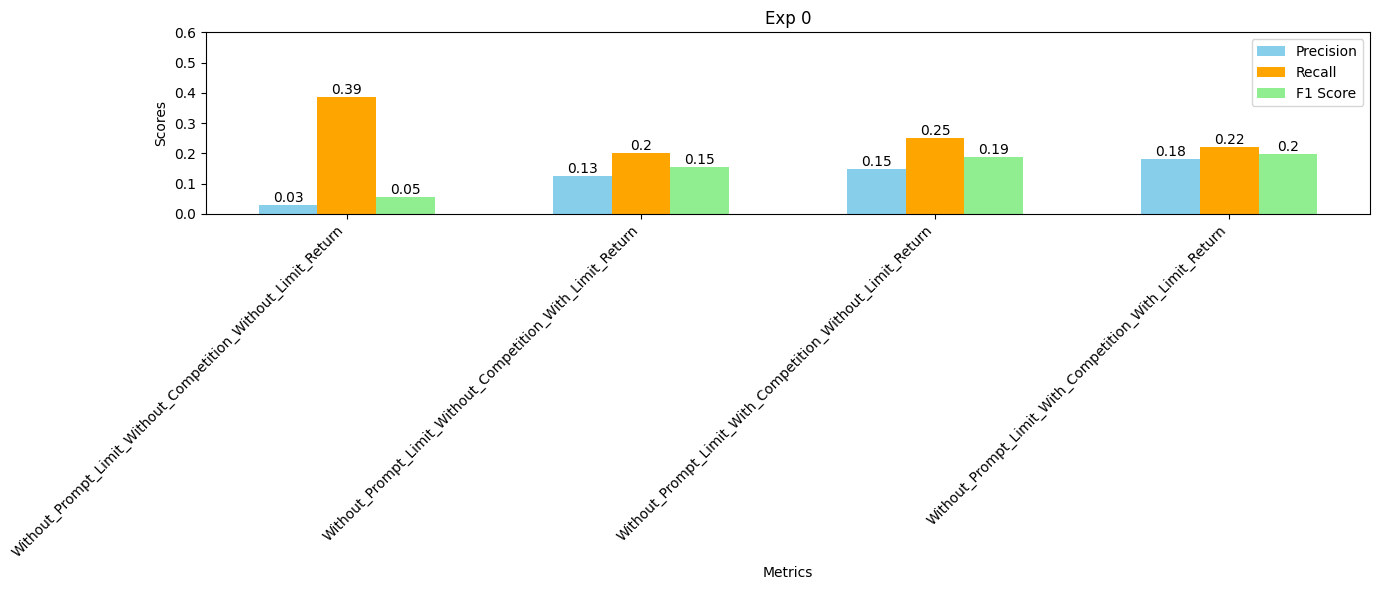

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import os
import csv
import ast
from sklearn.metrics import confusion_matrix
import math

# List of file names
folder = r'/content/Labeling-Sigma-rule-for-MITRE-ATT-CK/05 LLM'
file_names = []

os.chdir(folder)  # Change path
items = os.listdir()  # List everything in the directory

# Append sorted file paths to file_names
for item in items:
    if item.endswith("prompting_with_techniques_guide.csv"):
        file_names.append(os.path.join(folder, item))

print(file_names)

# Load all files into a dictionary of DataFrames
data_frames = {file: pd.read_csv(file) for file in file_names}


def get_column_names(file):
    df = pd.read_csv(file)
    # Return only columns that start with "Without"
    return [col for col in df.columns if col.startswith("Without")]

def visualPlot(expNumber: dict, plotName: int):
    # Initialize lists to accumulate evaluation results
    all_precisions = []
    all_recalls = []
    all_f1_scores = []
    xtick_labels = []  # Store xtick labels

    for file, df in expNumber.items():
        column_names = get_column_names(file)  # Get only relevant columns
        for cols in column_names:
            try:
                # Extract the true and predicted labels
                true_labels = df['True_labels']
                predicted_labels = df[cols]

                # Perform evaluation using the existing evaluation function
                print(f'\nEvaluating {file} column {cols}')
                results = evaluation(true_labels, predicted_labels, False)

                # Accumulate evaluation results
                for result in results:
                    precision, recall, f1_score = result
                    all_precisions.append(precision)
                    all_recalls.append(recall)
                    all_f1_scores.append(f1_score)

                # Append column name for xtick labels
                xtick_labels.append(cols)

            except KeyError as e:
                print(f'Error: Column {e} not found in {file}')
            except Exception as e:
                print(f'An error occurred while processing {file}: {e}')

    # Plotting all evaluation results in a single plot
    plt.figure(figsize=(14, 6))  # Adjust figure size as per requirement

    bar_width = 0.2
    index = range(len(all_precisions))

    bars1 = plt.bar([i - bar_width for i in index], all_precisions, width=bar_width, color='skyblue', label='Precision')
    bars2 = plt.bar(index, all_recalls, width=bar_width, color='orange', label='Recall')
    bars3 = plt.bar([i + bar_width for i in index], all_f1_scores, width=bar_width, color='lightgreen', label='F1 Score')

    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(f"Exp {plotName}")
    plt.xticks(index, xtick_labels, rotation=45, ha='right')  # Rotate labels and adjust spacing

    # Set custom y-axis limits
    plt.ylim(0, 0.6)  # Adjust this line as per your requirement

    plt.legend()

    # Add score ranks on the bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Experiment number or name for the plot title
experiment_number = 0  # You can change this to any integer or string for the plot name

# Call the visualPlot function with only "Without ..." columns
visualPlot(data_frames, experiment_number)
